In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train.shape 

(60000, 28, 28)

In [ ]:
# Convolution expects NxHxWxC

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Number of classes

K = len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
# Build the model using the Functional API

i = Input(shape= x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 42s 6ms/step - loss: 0.5149 - accuracy: 0.8098 - val_loss: 0.3872 - val_accuracy: 0.8551
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3521 - accuracy: 0.8677 - val_loss: 0.3612 - val_accuracy: 0.8684
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3088 - accuracy: 0.8844 - val_loss: 0.3168 - val_accuracy: 0.8860
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2735 - accuracy: 0.8969 - val_loss: 0.3266 - val_accuracy: 0.8812
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2480 - accuracy: 0.9060 - val_loss: 0.3074 - val_accuracy: 0.8925
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2273 - accuracy: 0.9134 - val_loss: 0.2994 - val_accuracy: 0.8928
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2099 - accuracy: 0.9210 - val_loss: 0.3033 - val_ac

Observation: We are getting a good accuracy.

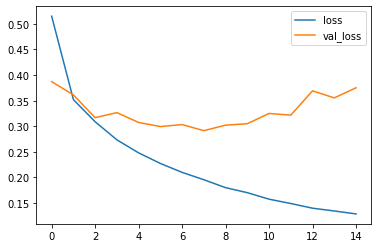

In [ ]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

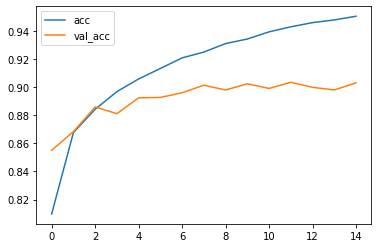

In [ ]:
# Plot the accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

Observtion: The model is overfitting. It appears that that the validation accuracy stays pretty steady. This is interesting to see when the validation loss simultaneously goes up. It means that the model is becoming more and more confident in its incorrect predictions.

Confusion matrix, without normalization
[[874   2  19  19   2   1  79   0   4   0]
 [  2 976   0  11   4   0   3   0   4   0]
 [ 12   0 831  13  72   0  71   0   1   0]
 [ 14   7  13 911  34   0  20   0   1   0]
 [  1   1  35  28 852   0  82   0   1   0]
 [  0   0   0   1   0 976   0  14   0   9]
 [119   0  47  26  72   0 721   0  15   0]
 [  0   0   0   0   0  18   0 967   0  15]
 [  2   2   0   2   5   3   9   3 974   0]
 [  1   0   0   0   0   6   0  43   0 950]]


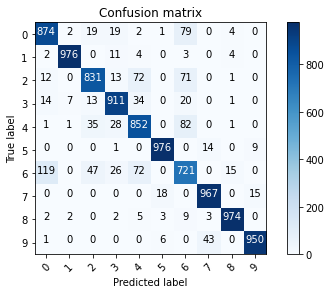

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



Observation: Lets check the two most wrong predictions.

a. True Label= 6, Predicted label= 0

b. True Label= 4, Predicted label= 6

In [ ]:
# Label mapping
labels = '''T-shirt/top
            Trouser
            Pullover
            Dress
            Coat
            Sandal
            Shirt
            Sneaker
            Bag
            Ankle boot'''.split("\n")
labels

['T-shirt/top',
 '            Trouser',
 '            Pullover',
 '            Dress',
 '            Coat',
 '            Sandal',
 '            Shirt',
 '            Sneaker',
 '            Bag',
 '            Ankle boot']

In [ ]:
np.where(p_test != y_test)[0]

array([  23,   25,   29,   42,   44,   49,   67,   68,   98,  103,  117,
        127,  135,  147,  150,  151,  202,  217,  222,  239,  244,  246,
        248,  269,  271,  313,  316,  324,  325,  332,  359,  368,  378,
        379,  381,  382,  394,  404,  425,  437,  441,  452,  454,  460,
        474,  476,  498,  511,  529,  565,  569,  578,  607,  608,  612,
        616,  628,  634,  635,  665,  669,  670,  688,  696,  711,  713,
        716,  724,  732,  760,  764,  767,  787,  805,  817,  823,  851,
        860,  877,  881,  893,  902,  905,  956,  960,  965,  966,  967,
        971,  972,  976,  977,  979,  984,  986, 1000, 1005, 1028, 1051,
       1066, 1100, 1101, 1111, 1130, 1131, 1139, 1142, 1147, 1152, 1158,
       1160, 1162, 1188, 1194, 1197, 1210, 1231, 1235, 1236, 1241, 1251,
       1254, 1261, 1280, 1286, 1300, 1305, 1306, 1312, 1315, 1322, 1326,
       1336, 1374, 1388, 1408, 1425, 1431, 1438, 1455, 1460, 1462, 1469,
       1471, 1482, 1487, 1496, 1504, 1522, 1533, 15

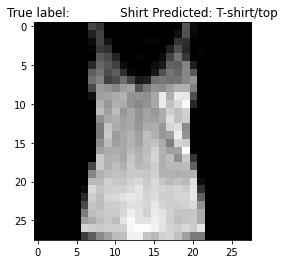

In [ ]:
# Lets see some of the misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap= 'gray')
plt.title("True label: %s Predicted: %s" %(labels[y_test[i]], labels[p_test[i]]))
plt.show()

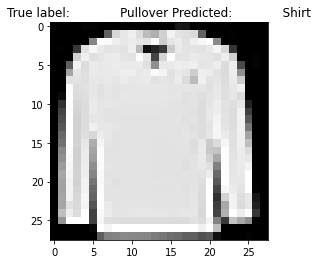

In [ ]:
# Lets see some of the misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap= 'gray')
plt.title("True label: %s Predicted: %s" %(labels[y_test[i]], labels[p_test[i]]))
plt.show()

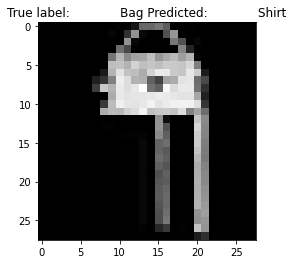

In [ ]:
# Lets see some of the misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap= 'gray')
plt.title("True label: %s Predicted: %s" %(labels[y_test[i]], labels[p_test[i]]))
plt.show()

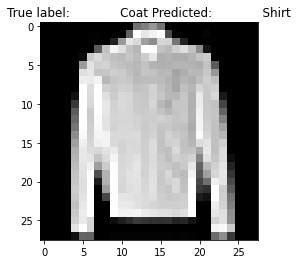

In [ ]:
# Lets see some of the misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap= 'gray')
plt.title("True label: %s Predicted: %s" %(labels[y_test[i]], labels[p_test[i]]))
plt.show()

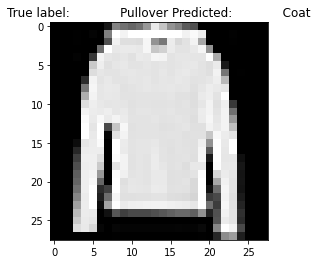

In [ ]:
# Lets see some of the misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap= 'gray')
plt.title("True label: %s Predicted: %s" %(labels[y_test[i]], labels[p_test[i]]))
plt.show()

# Happy Learning